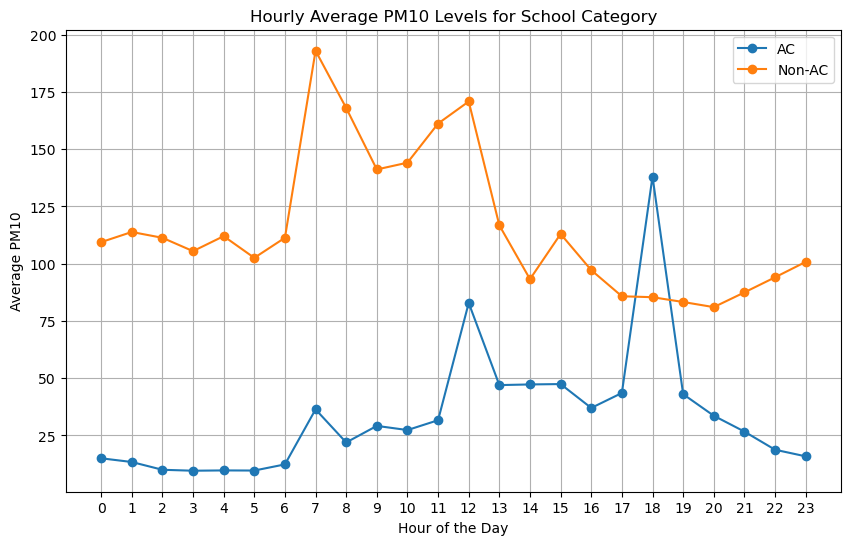

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'C:/Users/Atique/Desktop/IAQ_Master_file/Master_File_PM10.xlsx'  
df = pd.read_excel(file_path)


df['date_time'] = pd.to_datetime(df['date_time'], dayfirst=True, errors='coerce') # 'date_time' column to datetime format with mixed date formats

# Drop rows where 'date_time' could not be parsed
df = df.dropna(subset=['date_time'])

# Filter the data for the 'school' category
school_df = df[df['category'] == 'school'].copy()

# Extract hour from 'date_time' for hourly grouping
school_df['hour'] = school_df['date_time'].dt.hour

# hourly average PM10 values for 'ac' and 'nonac' sub-categories
ac_avg = school_df[school_df['sub_category'] == 'ac'].groupby('hour')['pm10'].mean()
nonac_avg = school_df[school_df['sub_category'] == 'nonac'].groupby('hour')['pm10'].mean()


plt.figure(figsize=(10, 6))
plt.plot(ac_avg.index, ac_avg.values, label='AC', marker='o')
plt.plot(nonac_avg.index, nonac_avg.values, label='Non-AC', marker='o')

plt.xlabel('Hour of the Day')
plt.ylabel('Average PM10')
plt.title('Hourly Average PM10 Levels for School Category')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

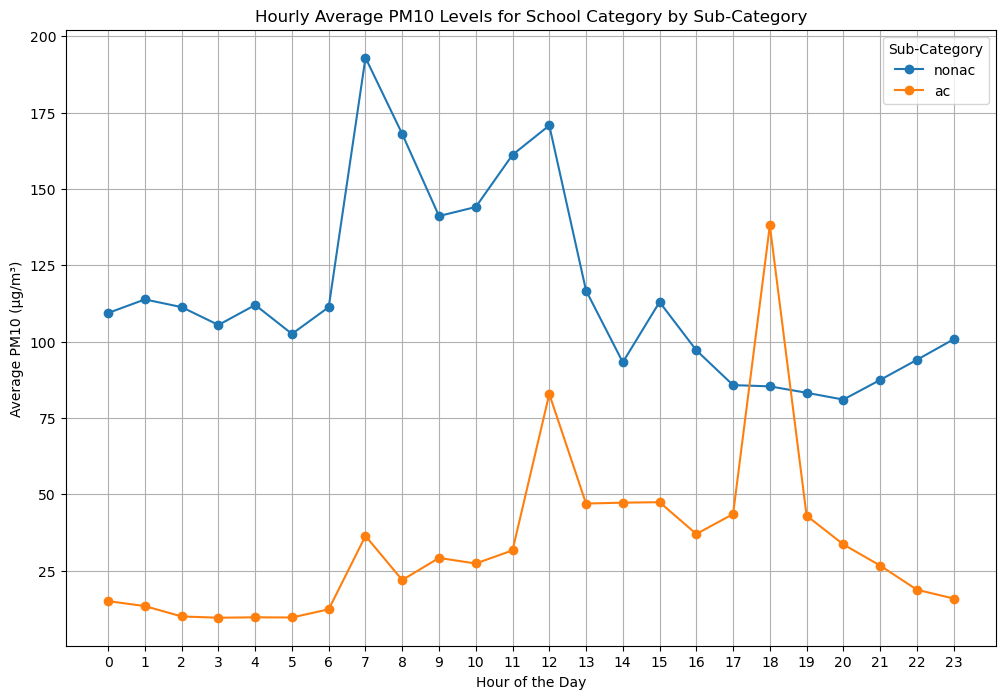

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'C:/Users/Atique/Desktop/IAQ_Master_file/Master_File_PM10.xlsx'   
df = pd.read_excel(file_path)

df['date_time'] = pd.to_datetime(df['date_time'], dayfirst=True, errors='coerce') # 'date_time' column to datetime format with mixed date formats


df = df.dropna(subset=['date_time']) # Drop rows where 'date_time' could not be parsed


school_df = df[df['category'] == 'school'].copy()  # Filter the data for the 'school' category

# Extract hour from 'date_time' for hourly grouping
school_df['hour'] = school_df['date_time'].dt.hour

# Initialize the plot
plt.figure(figsize=(12, 8))

# unique sub_categories
sub_categories = school_df['sub_category'].unique()

 # hourly average PM10 values for each sub_category
for sub_category in sub_categories:
    sub_category_avg = school_df[school_df['sub_category'] == sub_category].groupby('hour')['pm10'].mean()
    plt.plot(sub_category_avg.index, sub_category_avg.values, label=sub_category, marker='o')


plt.xlabel('Hour of the Day')
plt.ylabel('Average PM10 (µg/m³)')
plt.title('Hourly Average PM10 Levels for School Category by Sub-Category')
plt.legend(title='Sub-Category')
plt.grid(True)
plt.xticks(range(0, 24))

plt.savefig('hourly_pm10_school_category.jpg', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()